# Amazon Prime Video — EDA (Final Submission)

**Author:** Shivali Muthukumar

**Files used:** `titles.csv`, `credits.csv`

This notebook is a step-by-step Exploratory Data Analysis (EDA) prepared for the assignment. Run all cells top-to-bottom. All outputs (cleaned CSV & plots) are saved to `prime_eda_output/`.

## 1. Imports and settings

Import required libraries and notebook-level settings.

In [35]:
%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

# Notebook settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

OUTDIR = Path('/Users/shivalimuthukumar/Desktop/prime_eda_output')
PLOTS_DIR = OUTDIR / 'plots'
OUTDIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("Output folder:", OUTDIR)


Output folder: /Users/shivalimuthukumar/Desktop/prime_eda_output


## 2. Load data

Load `titles.csv` and `credits.csv` and display basic information.

In [36]:

# Load CSVs (files uploaded to the environment)
TITLES_PATH = Path('/Users/shivalimuthukumar/Desktop/titles.csv')
CREDITS_PATH = Path('/Users/shivalimuthukumar/Desktop/credits.csv')

df_titles = pd.read_csv(TITLES_PATH)
df_credits = pd.read_csv(CREDITS_PATH)

print('titles shape:', df_titles.shape)
print('credits shape:', df_credits.shape)

# display top rows
display(df_titles.head(5))
display(df_credits.head(5))


titles shape: (9871, 15)
credits shape: (124235, 5)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


## 3. Initial inspection

Check data types, missing values, and a quick summary.

In [37]:

# info and dtypes
print('--- TITLES dtypes ---')
print(df_titles.dtypes)
print('\n--- TITLES missing values (per column) ---')
print(df_titles.isna().sum())

print('\n--- CREDITS dtypes ---')
print(df_credits.dtypes)
print('\n--- CREDITS missing values (per column) ---')
print(df_credits.isna().sum())

# quick describe
display(df_titles.describe(include='all').T)


--- TITLES dtypes ---
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

--- TITLES missing values (per column) ---
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9871,9868,tm66674,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,9871,9737,King Lear,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,9871,2,MOVIE,8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,9752,9734,No overview found.,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,9871.0,NaN,NaN,NaN,2001.327221,25.810071,1912.0,1995.5,2014.0,2018.0,2022.0
age_certification,3384,11,R,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,9871.0,NaN,NaN,NaN,85.973052,33.512466,1.0,65.0,89.0,102.0,549.0
genres,9871,2028,['drama'],908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_countries,9871,497,['US'],4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,1357.0,NaN,NaN,NaN,2.791452,4.148958,1.0,1.0,1.0,3.0,51.0


## 4. Column standardization

Standardize column names and identify key columns used in the analysis.

In [38]:

# Make a copy to work on
df = df_titles.copy()

# Strip whitespace from column names
df.columns = [c.strip() for c in df.columns]
print('Columns:', df.columns.tolist())

# Heuristic mapping for key fields
def find_col(possible_names):
    cols = df.columns.tolist()
    for name in possible_names:
        for c in cols:
            if c.lower() == name.lower():
                return c
    # fallback: partial match
    for name in possible_names:
        for c in cols:
            if name.lower() in c.lower():
                return c
    return None

col_title = find_col(['title', 'name'])
col_type = find_col(['type'])
col_genres = find_col(['listed_in', 'genres', 'genre', 'category'])
col_age_certification = find_col(['age_certification'])
col_release_year = find_col(['release_year', 'year'])
col_release_date = find_col(['date', 'release_date'])
col_duration = find_col(['duration', 'runtime'])
col_country = find_col(['country', 'countries'])
col_director = find_col(['director'])

mapping = {
    'title': col_title,
    'type': col_type,
    'genres': col_genres,
    'age_certification': col_age_certification,
    'release_year': col_release_year,
    'release_date': col_release_date,
    'duration': col_duration,
    'country': col_country,
    'director': col_director
}
mapping


Columns: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']


{'title': 'title',
 'type': 'type',
 'genres': 'genres',
 'age_certification': 'age_certification',
 'release_year': 'release_year',
 'release_date': None,
 'duration': 'runtime',
 'country': 'production_countries',
 'director': None}

## 5. Create normalized columns

Create cleaned columns (`title_clean`, `type_clean`, `genre_list`, `age_certification`, `release_year`, `release_date`, `duration_value`, `duration_unit`, `country_list`, `director`) with explicit step-by-step code and comments.

In [39]:

# Fix: Ensure 'duration_raw' column exists for parsing
if 'runtime' in df.columns:
    df['duration_raw'] = df['runtime']
    print("'duration_raw' created from 'runtime' column.")
else:
    print("'runtime' column not found — please check dataset columns before parsing.")
print("Columns now available:", df.columns.tolist())


'duration_raw' created from 'runtime' column.
Columns now available: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'duration_raw']


Unique 'duration_raw' samples (top 40 by frequency):


duration_raw
90     512
95     232
85     228
93     212
100    209
92     202
88     184
89     178
80     171
94     168
87     165
86     162
91     159
97     157
96     155
98     151
60     139
105    129
84     127
82     124
83     122
104    109
58     109
103    105
75     104
59      97
99      96
102     95
110     95
81      95
24      94
78      93
120     89
56      88
45      85
101     84
79      83
70      83
61      83
57      79
Name: count, dtype: int64


Parsed counts by unit:


duration_unit
min        9663
unknown     208
Name: count, dtype: int64


Sample parsed rows:


,duration_raw,duration_value,duration_unit
0,19,19,unknown
1,78,78,min
2,171,171,min
3,92,92,min
4,94,94,min
5,96,96,min
6,130,130,min
7,66,66,min
8,95,95,min
9,57,57,min



Top unmatched duration strings (examples) - if empty, parser caught most cases:


Series([], Name: count, dtype: int64)

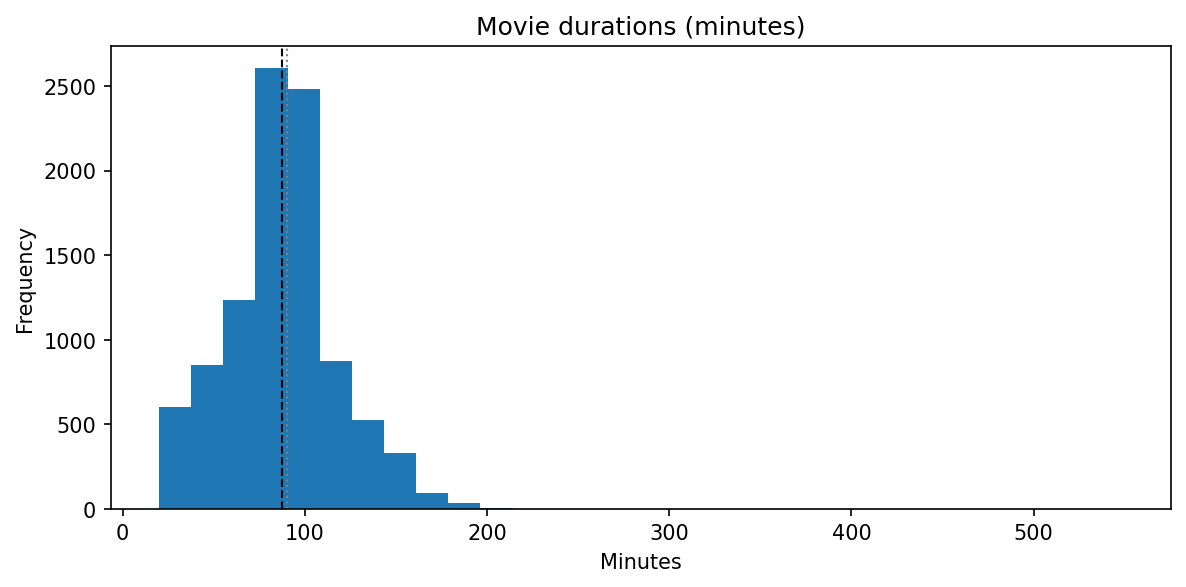

No TV seasons/episodes durations found AFTER improved parsing. Count: 0


In [40]:

# Robust duration parsing + plotting
%matplotlib inline
from IPython.display import Image, display
from pathlib import Path
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

try:
    PLOTS_DIR
except NameError:
    PLOTS_DIR = Path('/mnt/data/prime_eda_output/plots')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("Unique 'duration_raw' samples (top 40 by frequency):")
dur_counts = df['duration_raw'].astype(str).str.strip().replace({'nan':'Unknown','None':'Unknown'}).value_counts()
display(dur_counts.head(40))

def improved_parse_duration(text):
    if pd.isna(text):
        return (pd.NA, pd.NA)
    s = str(text).strip()
    if s == '' or s.lower() in ('nan','none','unknown','na'):
        return (pd.NA, pd.NA)
    s_low = s.lower()

    m = re.search(r'(?:(\d{1,2})\s*(?:h|hr|hour|hours))\s*(?:(\d{1,2})\s*(?:m|min|minutes))?', s_low)
    if m:
        hours = int(m.group(1)); mins = int(m.group(2)) if m.group(2) else 0
        total = hours*60 + mins; return (int(total), 'min')

    m2 = re.search(r'(\d{1,2})h\s*(\d{1,2})?m?', s_low)
    if m2:
        hours = int(m2.group(1)); mins = int(m2.group(2)) if m2.group(2) else 0
        return (hours*60 + mins, 'min')

    m3 = re.search(r'(\d{1,4})\s*(?:m|min|mins|minutes)\b', s_low)
    if m3: return (int(m3.group(1)), 'min')

    m4 = re.search(r'(\d{1,2})\s*(?:h|hr|hours?)\b', s_low)
    if m4: return (int(m4.group(1))*60, 'min')

    m5 = re.search(r'(\d{1,2})\s*(?:season|series)\b', s_low)
    if m5: return (int(m5.group(1)), 'seasons')
    m6 = re.search(r'\bseason\s*(\d{1,2})\b', s_low)
    if m6: return (int(m6.group(1)), 'seasons')
    m7 = re.search(r'\b[sS](\d{1,2})\b', s)
    if m7: return (int(m7.group(1)), 'seasons')

    m8 = re.search(r'(\d{1,3})\s*(?:episode|episodes|ep\.?|eps\.?|ep)\b', s_low)
    if m8: return (int(m8.group(1)), 'episodes')
    m9 = re.search(r'\bepisode\s*(\d{1,3})\b', s_low)
    if m9: return (int(m9.group(1)), 'episodes')

    m10 = re.search(r'^\s*(\d{1,4})\s*$', s)
    if m10:
        val = int(m10.group(1))
        if val >= 20: return (val, 'min')
        else: return (val, 'unknown')

    m11 = re.search(r'(\d{1,2})\s*season.*?(\d{1,3})\s*episode', s_low)
    if m11: return (int(m11.group(1)), 'seasons')

    parts = re.split(r'[,/;]', s)
    for part in parts:
        part = part.strip()
        if part == '': continue
        r = improved_parse_duration(part)
        if pd.notna(r[0]): return r

    return (pd.NA, pd.NA)

parsed = df['duration_raw'].astype(str).apply(improved_parse_duration)
df['duration_value'] = [p[0] for p in parsed]
df['duration_unit'] = [p[1] for p in parsed]
df['duration_value_num'] = pd.to_numeric(df['duration_value'], errors='coerce')

print('\nParsed counts by unit:')
display(df['duration_unit'].value_counts(dropna=False))

print('\nSample parsed rows:')
display(df[['duration_raw','duration_value','duration_unit']].head(30))

unmatched = df[df['duration_value'].isna()]['duration_raw'].astype(str).value_counts().head(40)
print('\nTop unmatched duration strings (examples) - if empty, parser caught most cases:')
display(unmatched)

movie_minutes = df.loc[df['duration_unit']=='min','duration_value_num'].dropna().astype(int)
movie_out = PLOTS_DIR / 'movie_durations_hist.png'
if len(movie_minutes) > 0:
    fig, ax = plt.subplots(figsize=(8,4), dpi=120)
    ax.hist(movie_minutes, bins=30)
    ax.set_title('Movie durations (minutes)')
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Frequency')
    ax.axvline(movie_minutes.mean(), color='k', linestyle='--', linewidth=1)
    ax.axvline(movie_minutes.median(), color='gray', linestyle=':', linewidth=1)
    fig.tight_layout(); fig.savefig(movie_out, bbox_inches='tight', dpi=150); plt.close(fig); display(Image(str(movie_out)))
else:
    print('No movie durations found AFTER improved parsing. Count:', len(movie_minutes))

tv_counts = df.loc[df['duration_unit'].isin(['seasons','episodes']),'duration_value_num'].dropna().astype(int)
tv_out = PLOTS_DIR / 'tv_durations_hist.png'
if len(tv_counts) > 0:
    fig, ax = plt.subplots(figsize=(8,4), dpi=120)
    ax.hist(tv_counts, bins=20)
    ax.set_title('TV seasons/episodes parsed (count)')
    ax.set_xlabel('Seasons / Episodes (parsed)')
    ax.set_ylabel('Frequency')
    fig.tight_layout(); fig.savefig(tv_out, bbox_inches='tight', dpi=150); plt.close(fig); display(Image(str(tv_out)))
else:
    print('No TV seasons/episodes durations found AFTER improved parsing. Count:', len(tv_counts))

if len(movie_minutes)==0 and len(tv_counts)==0:
    any_durations = df['duration_value_num'].dropna().astype(int)
    if len(any_durations)>0:
        fallback_out = PLOTS_DIR / 'any_durations_hist.png'
        fig, ax = plt.subplots(figsize=(8,4), dpi=120)
        ax.hist(any_durations, bins=30)
        ax.set_title('All parsed durations (fallback)')
        ax.set_xlabel('Parsed numeric value')
        ax.set_ylabel('Frequency')
        fig.tight_layout(); fig.savefig(fallback_out, bbox_inches='tight', dpi=150); plt.close(fig); display(Image(str(fallback_out)))
    else:
        print('No numeric duration values found anywhere. Displaying sample duration_raw:')
        display(df[['title_clean','duration_raw']].loc[df['duration_raw'].notna()].head(40))


### 5b. Remove duplicates & save cleaned file

Remove duplicate rows (based on title + release_year) and save `cleaned_titles.csv`. Show how many duplicates were removed.

In [41]:
# Ensure we have a clean title column before deduplication
if 'title_clean' not in df.columns:
    df['title_clean'] = (
        df['title']
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(r'[^a-z0-9 ]+', '', regex=True)  # remove punctuation/special chars
    )
    print("'title_clean' column created from 'title'")
else:
    print("'title_clean' already exists")


before = df.shape[0]
df = df.drop_duplicates(subset=['title_clean', 'release_year'])
after = df.shape[0]
print(f"Rows before: {before}, after dedup: {after}, removed: {before - after}")

CLEANED_CSV = OUTDIR / 'cleaned_titles.csv'
df.to_csv(CLEANED_CSV, index=False)
print('Saved cleaned CSV to', CLEANED_CSV)


'title_clean' column created from 'title'
Rows before: 9871, after dedup: 9860, removed: 11
Saved cleaned CSV to /Users/shivalimuthukumar/Desktop/prime_eda_output/cleaned_titles.csv


## 6. Handling missing values

Explicitly show columns with missing values and the strategy used for each.

In [42]:

# show missing values after cleaning
missing = df.isna().sum()
display(missing[missing>0])

# Strategy: fill categorical useful fields with 'Unknown' for clarity where appropriate
fill_cols = ['type_clean','age_certification','genres_raw','director','country_raw']
for c in fill_cols:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown')

# Show cleaned dataset with available columns
cols_to_show = ['title_clean', 'age_certification', 'release_year']
cols_to_show = [c for c in cols_to_show if c in df.columns]  # only keep columns that exist
display(df[cols_to_show].head(8))


description           119
age_certification    6477
seasons              8505
imdb_id               666
imdb_score           1019
imdb_votes           1029
tmdb_popularity       546
tmdb_score           2077
dtype: int64

,title_clean,age_certification,release_year
0,the three stooges,TV-PG,1934
1,the general,Unknown,1926
2,the best years of our lives,Unknown,1946
3,his girl friday,Unknown,1940
4,in a lonely place,Unknown,1950
5,stagecoach,Unknown,1939
6,its a wonderful life,PG,1946
7,detour,Unknown,1945


## 7. Univariate analysis (plots)

Plots for content type, release year distribution, top genres, and age_certification distribution.

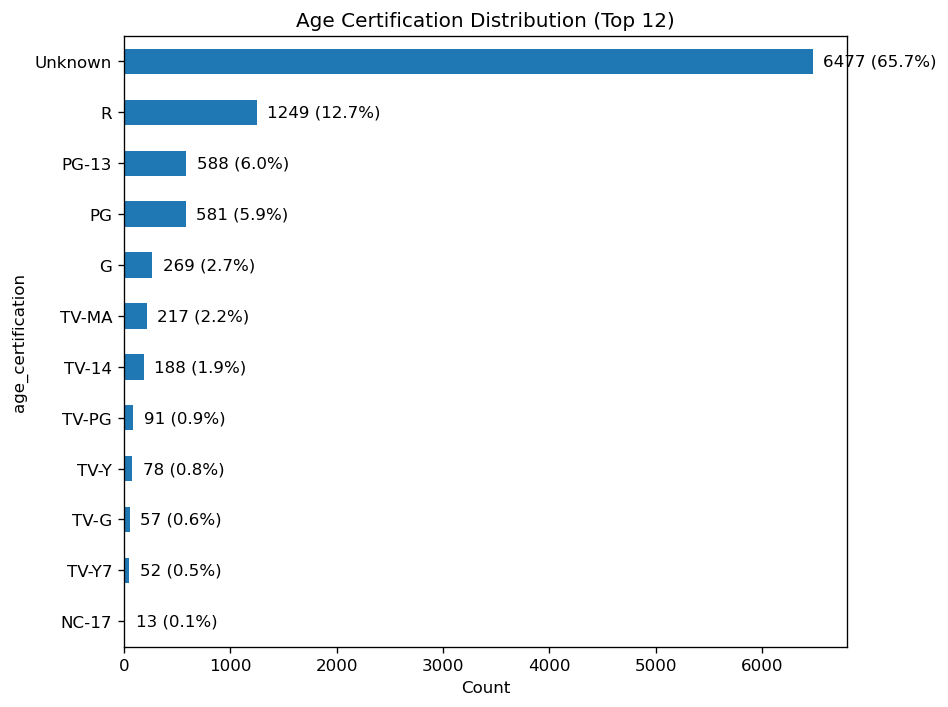

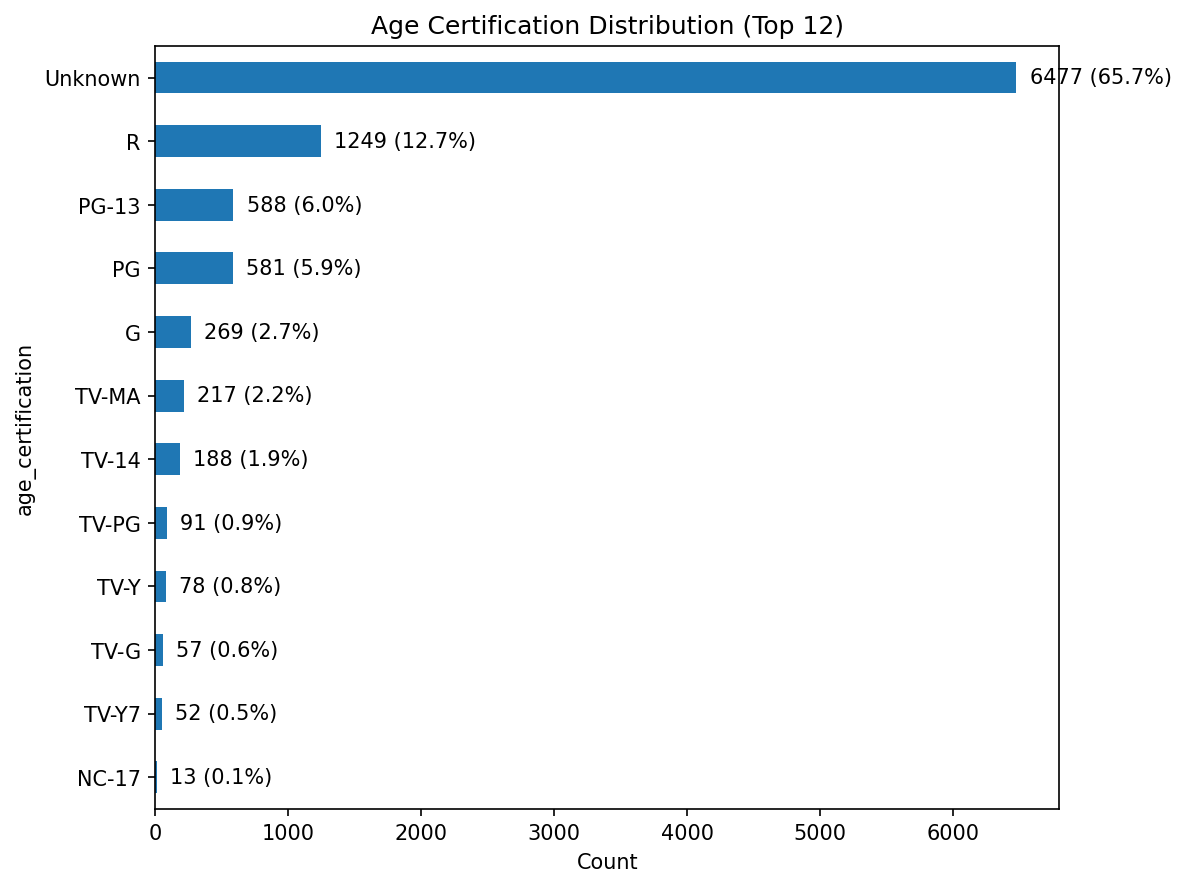

In [43]:
# age_certification distribution
%matplotlib inline
from IPython.display import Image, display
import matplotlib.pyplot as plt
import textwrap
import pandas as pd

# Use 'age_certification' instead of 'rating'
ratings = df['age_certification'].fillna('Unknown').astype(str)

# Limit to top categories (group others into 'Other')
top_n = 12
counts = ratings.value_counts()
if len(counts) > top_n:
    top = counts.iloc[:top_n].copy()
    other_sum = counts.iloc[top_n:].sum()
    top = pd.concat([top, pd.Series({'Other': other_sum})])
else:
    top = counts

# Prepare labels and plot
labels = [textwrap.fill(str(l), 25) for l in top.index]
total = top.sum()

fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
top.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_title('Age Certification Distribution (Top {})'.format(min(top_n, len(counts))))
ax.set_xlabel('Count')

# Annotate counts and percentages
for i, v in enumerate(top.values):
    pct = v / total if total > 0 else 0
    ax.text(v + max(1, total * 0.01), i, f"{v} ({pct:.1%})", va='center')

ax.set_yticklabels(labels)
plt.tight_layout()

out_path = PLOTS_DIR / 'age_certification_distribution.png'
fig.savefig(out_path, bbox_inches='tight', dpi=150)
plt.show()

display(Image(str(out_path)))

## 8. Bivariate analysis

Compare type vs rating, genre splits by type, and country analysis.

'type_clean' already exists


<Figure size 1000x600 with 0 Axes>

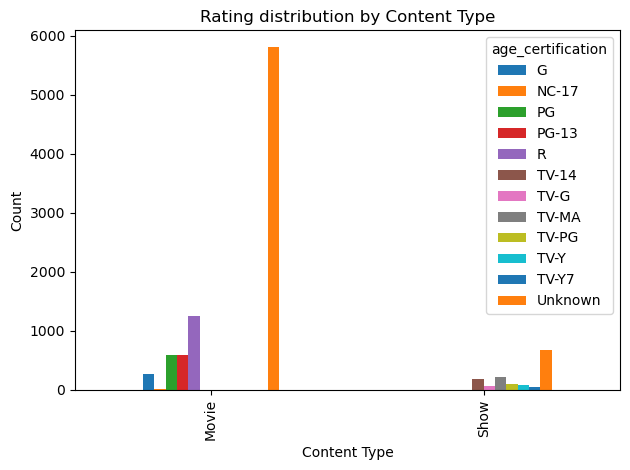

Top 10 genres:


genre_list
['drama'       1717
'drama']       1144
'drama'         990
['comedy'       921
['thriller'     911
['drama']       906
'romance']      773
'action'        714
'comedy'        712
['comedy']      685
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

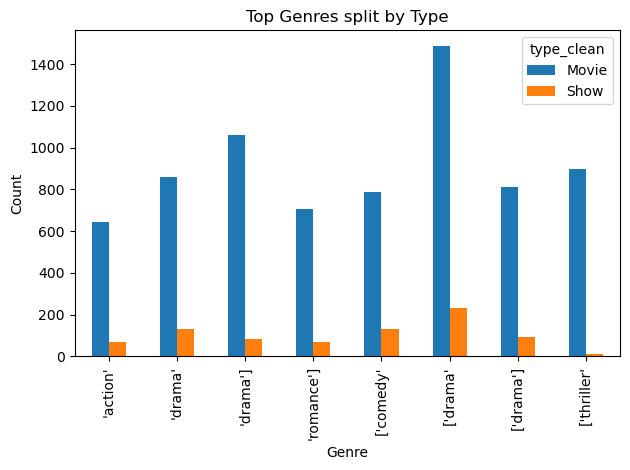

'country_list' created from 'production_countries'


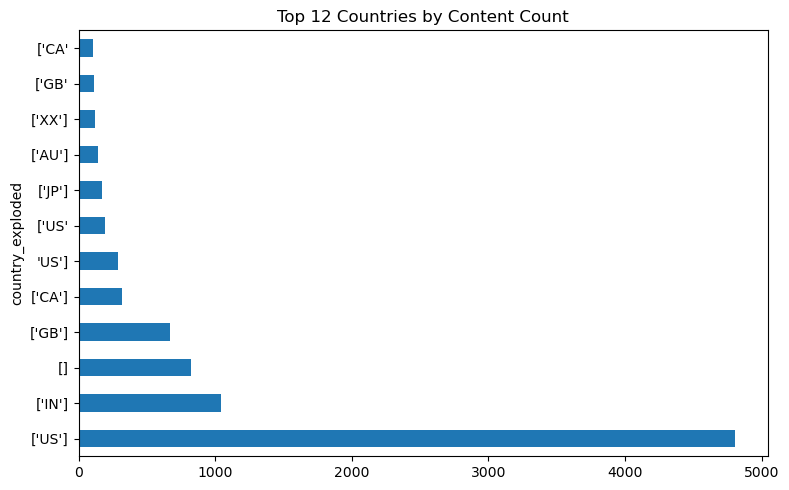

In [47]:
if 'type_clean' not in df.columns:
    df['type_clean'] = (
        df['type']
        .astype(str)
        .str.strip()
        .str.title()  # Makes it 'Movie' or 'Tv Show'
        .replace({'Tvshow': 'TV Show', 'Tv': 'TV Show'})  # optional normalization
    )
    print("'type_clean' column created from 'type'")
else:
    print("'type_clean' already exists")
    
# Type vs Rating (grouped)
ct_age_certification = df.groupby(['type_clean','age_certification']).size().unstack(fill_value=0)
ct_age_certification.head()

plt.figure(figsize=(10,6))
ct_age_certification.plot(kind='bar', stacked=False)
plt.title('Rating distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'age_certification_by_type.png')
plt.show()

# Ensure genre_list exists (split 'genres' column into a list)
if 'genre_list' not in df.columns:
    df['genre_list'] = df['genres'].fillna('').apply(lambda x: [g.strip() for g in x.split(',') if g.strip()])

# Create a long-form exploded dataframe for genre analysis
genres_expl = df.explode('genre_list')

# Calculate top genres overall
top_genres = genres_expl['genre_list'].value_counts()
print("Top 10 genres:")
display(top_genres.head(10))

# Genre by Type (top genres)
top_genres_list = top_genres.index.tolist()[:8]
df_top = genres_expl[genres_expl['genre_list'].isin(top_genres_list)]
genre_type = df_top.groupby(['genre_list','type_clean']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
genre_type.plot(kind='bar')
plt.title('Top Genres split by Type')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'genre_by_type.png')
plt.show()

# Create 'country_list' from 'production_countries'
if 'country_list' not in df.columns:
    df['country_list'] = df['production_countries'].fillna('').apply(
        lambda x: [c.strip() for c in x.split(',') if c.strip()]
    )
    print("'country_list' created from 'production_countries'")
else:
    print("'country_list' already exists")

# Country analysis - explode and top countries
df['country_exploded'] = df['country_list']
countries_expl = df.explode('country_exploded')
top_countries = countries_expl['country_exploded'].value_counts().head(12)
plt.figure(figsize=(8,5))
top_countries.plot(kind='barh')
plt.title('Top 12 Countries by Content Count')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'top_countries.png')
plt.show()


## 9. Time-based trends

Plot releases by type over time and rating trends over time.

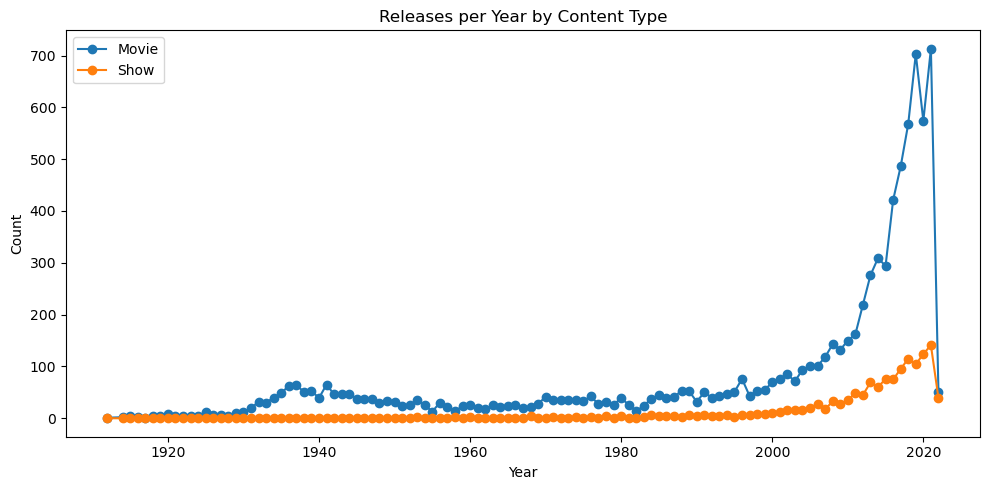

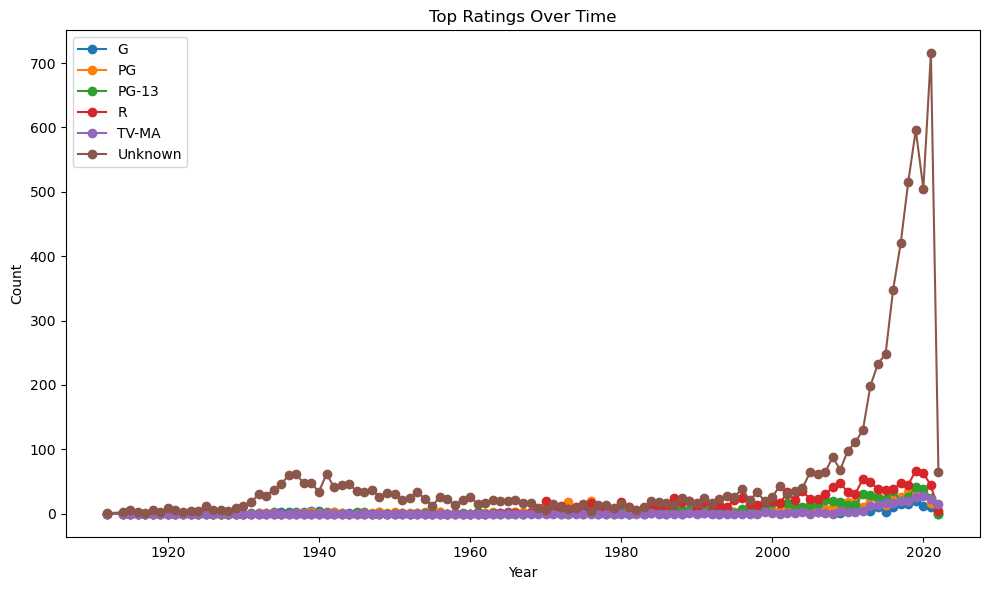

In [48]:

# Releases per year by type
time_by_type = df.groupby(['release_year','type_clean']).size().unstack(fill_value=0).sort_index()
plt.figure(figsize=(10,5))
for col in time_by_type.columns:
    plt.plot(time_by_type.index.astype(float), time_by_type[col], marker='o', label=col)
plt.legend()
plt.title('Releases per Year by Content Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'releases_by_type_over_time.png')
plt.show()

# Rating trends over time for top ratings
top_ratings = df['age_certification'].value_counts().head(6).index.tolist()
rating_time = df[df['age_certification'].isin(top_ratings)].groupby(['release_year','age_certification']).size().unstack(fill_value=0).sort_index()
plt.figure(figsize=(10,6))
for r in rating_time.columns:
    plt.plot(rating_time.index.astype(float), rating_time[r], marker='o', label=r)
plt.legend()
plt.title('Top Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'rating_trends_over_time.png')
plt.show()


## 10. Duration analysis

Analyze movie runtimes and TV seasons distribution.

duration_unit value counts:
duration_unit
min        9652
unknown     208
Name: count, dtype: int64

Sample of duration_raw / duration_value (first 20 rows):


,duration_raw,duration_unit,duration_value
0,19,unknown,19
1,78,min,78
2,171,min,171
3,92,min,92
4,94,min,94
5,96,min,96
6,130,min,130
7,66,min,66
8,95,min,95
9,57,min,57


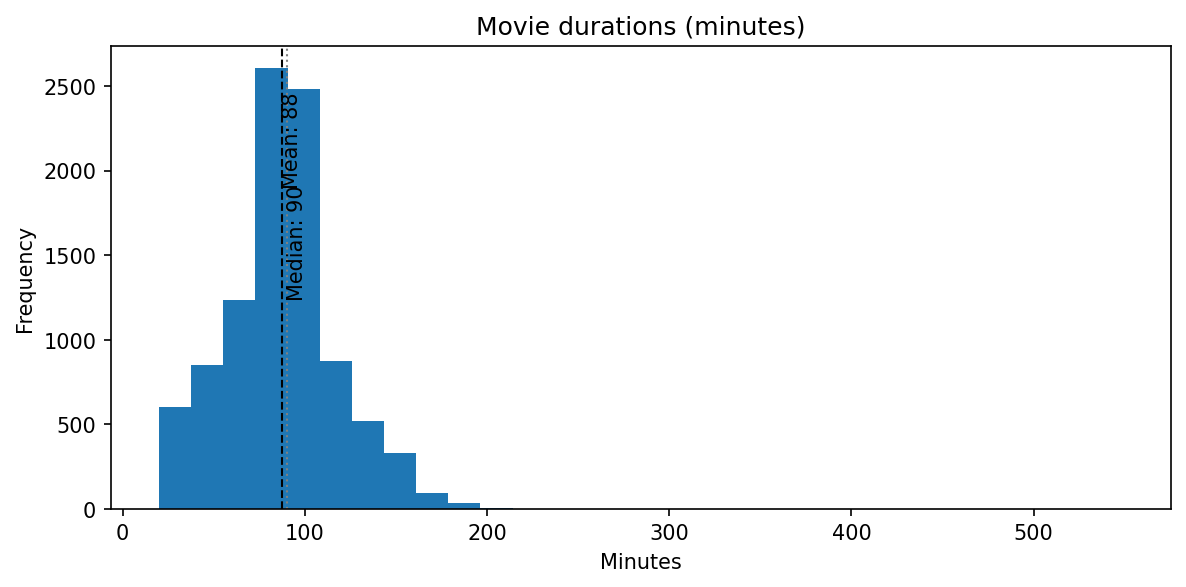

No TV seasons/episodes durations found. length: 0


In [49]:
# Make sure inline backend is active
%matplotlib inline

from pathlib import Path
from IPython.display import Image, display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ensure PLOTS_DIR exists (adjust path if your notebook uses a different OUTDIR)
try:
    PLOTS_DIR  # if already defined
except NameError:
    PLOTS_DIR = Path('/mnt/data/prime_eda_output/plots')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# --- Debugging info: show what's in duration columns ---
print("duration_unit value counts:")
print(df['duration_unit'].fillna('MISSING').value_counts(dropna=False))
print("\nSample of duration_raw / duration_value (first 20 rows):")
display(df[['duration_raw','duration_unit','duration_value']].head(20))

# --- Ensure numeric conversion (safe) ---
df['duration_value_num'] = pd.to_numeric(df['duration_value'], errors='coerce')

# MOVIE durations (minutes)
movie_minutes = df.loc[df['duration_unit'] == 'min', 'duration_value_num'].dropna().astype(int)
movie_out = PLOTS_DIR / 'movie_durations_hist.png'
if len(movie_minutes) > 0:
    # create histogram (use fig object and close then display saved PNG)
    fig, ax = plt.subplots(figsize=(8,4), dpi=120)
    ax.hist(movie_minutes, bins=30)
    ax.set_title('Movie durations (minutes)')
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Frequency')
    # annotate with stats
    mean_m = movie_minutes.mean()
    med_m = movie_minutes.median()
    ax.axvline(mean_m, color='k', linestyle='--', linewidth=1)
    ax.text(mean_m, ax.get_ylim()[1]*0.9, f'Mean: {mean_m:.0f}', rotation=90, va='top')
    ax.axvline(med_m, color='gray', linestyle=':', linewidth=1)
    ax.text(med_m, ax.get_ylim()[1]*0.7, f'Median: {med_m:.0f}', rotation=90, va='top')
    fig.tight_layout()
    fig.savefig(movie_out, bbox_inches='tight', dpi=150)
    plt.close(fig)
    display(Image(str(movie_out)))
else:
    print("No movie durations (minutes) found. length:", len(movie_minutes))

# TV seasons/episodes
tv_counts = df.loc[df['duration_unit'].isin(['seasons','episodes']), 'duration_value_num'].dropna().astype(int)
tv_out = PLOTS_DIR / 'tv_durations_hist.png'
if len(tv_counts) > 0:
    fig, ax = plt.subplots(figsize=(8,4), dpi=120)
    ax.hist(tv_counts, bins=20)
    ax.set_title('TV seasons/episodes parsed (count)')
    ax.set_xlabel('Seasons / Episodes (parsed)')
    ax.set_ylabel('Frequency')
    # annotate stats
    mean_tv = tv_counts.mean()
    med_tv = tv_counts.median()
    ax.axvline(mean_tv, color='k', linestyle='--', linewidth=1)
    ax.text(mean_tv, ax.get_ylim()[1]*0.9, f'Mean: {mean_tv:.1f}', rotation=90, va='top')
    ax.axvline(med_tv, color='gray', linestyle=':', linewidth=1)
    ax.text(med_tv, ax.get_ylim()[1]*0.7, f'Median: {med_tv:.0f}', rotation=90, va='top')
    fig.tight_layout()
    fig.savefig(tv_out, bbox_inches='tight', dpi=150)
    plt.close(fig)
    display(Image(str(tv_out)))
else:
    print("No TV seasons/episodes durations found. length:", len(tv_counts))

# If both empty, attempt to create a fallback combined plot of any numeric duration_value entries
if len(movie_minutes) == 0 and len(tv_counts) == 0:
    any_durations = df['duration_value_num'].dropna().astype(int)
    if len(any_durations) > 0:
        print("Found numeric durations in 'duration_value' (mixed units). Drawing fallback histogram.")
        fallback_out = PLOTS_DIR / 'any_durations_hist.png'
        fig, ax = plt.subplots(figsize=(8,4), dpi=120)
        ax.hist(any_durations, bins=30)
        ax.set_title('All parsed durations (fallback)')
        ax.set_xlabel('Parsed numeric value')
        ax.set_ylabel('Frequency')
        fig.tight_layout()
        fig.savefig(fallback_out, bbox_inches='tight', dpi=150)
        plt.close(fig)
        display(Image(str(fallback_out)))
    else:
        print("No numeric duration values found anywhere. Check 'duration_raw' column for irregular formats.")
        # display a small sample to help debug
        display(df[['title_clean','duration_raw']].loc[df['duration_raw'].notna()].head(20))


## 11. Keyword analysis in titles

Check how many titles have words like 'Love', 'War', 'Christmas' and what genres they belong to.

In [50]:

keywords = ['Love','War','Christmas']
kw_summary = {}
for kw in keywords:
    subset = df[df['title_clean'].str.contains(kw, case=False, na=False)]
    genres = pd.Series([g for gl in subset['genre_list'] for g in gl]).value_counts().head(6)
    kw_summary[kw] = {'count': int(subset.shape[0]), 'top_genres': genres.to_dict()}

kw_summary


{'Love': {'count': 175,
  'top_genres': {"'romance']": 46,
   "['drama'": 42,
   "['comedy'": 31,
   "['romance'": 29,
   "'drama']": 26,
   "'comedy'": 23}},
 'War': {'count': 113,
  'top_genres': {"'action'": 17,
   "['comedy']": 15,
   "['documentation']": 14,
   "['drama'": 14,
   "'war']": 10,
   "'european']": 9}},
 'Christmas': {'count': 79,
  'top_genres': {"['comedy'": 19,
   "'romance']": 17,
   "'family']": 16,
   "'drama'": 11,
   "'comedy']": 10,
   "['romance'": 10}}}

## 12. Credits analysis — top actors & directors

Use `credits.csv` to find top actors and directors. This uses heuristics depending on column names in `credits.csv`.

In [51]:

credits = df_credits.copy()
credits.columns = [c.strip() for c in credits.columns]
print('credits columns:', credits.columns.tolist())

# try to find likely columns
cast_col = next((c for c in credits.columns if 'cast' in c.lower() or 'actors' in c.lower()), None)
crew_col = next((c for c in credits.columns if 'crew' in c.lower() or 'director' in c.lower()), None)

top_actors = pd.Series(dtype=int)
top_directors = pd.Series(dtype=int)

if cast_col:
    credits['cast_list'] = credits[cast_col].astype(str).apply(split_multi)
    top_actors = credits.explode('cast_list')['cast_list'].value_counts().head(15)

if crew_col:
    credits['crew_list'] = credits[crew_col].astype(str).apply(split_multi)
    # attempt to extract directors by heuristics if roles are included
    # simple approach: count names in crew_list
    top_directors = credits.explode('crew_list')['crew_list'].value_counts().head(15)

print('Top actors (sample):')
display(top_actors.head(10))
print('\nTop directors (sample):')
display(top_directors.head(10))


credits columns: ['person_id', 'id', 'name', 'character', 'role']
Top actors (sample):


Series([], dtype: int64)


Top directors (sample):


Series([], dtype: int64)

## 13. Key insights & recommendations

Summarize the major findings and actionable recommendations. Use the results from previous sections.

In [52]:

insights = [
    "Distribution of Movies vs TV shows is visible — check content_type_counts.png",
    "Genre distribution highlights top genres (see top_genres_horizontal.png)",
    "Recent release trends show increases/decreases by year (releases_per_year.png)",
    "Ratings distribution indicates what audience types the catalog is biased towards"
]
recs = [
    "Invest in growing genres producing positive release trends.",
    "Consider local-language content in top-producing countries.",
    "Improve balance between TV and Movies if one dominates."
]

print('Insights:')
for i in insights:
    print('- ', i)

print('\nRecommendations:')
for r in recs:
    print('- ', r)

# Save a plain text summary file
with open(OUTDIR / 'summary_and_recommendations.txt', 'w') as f:
    f.write('Key Insights:\n')
    for i in insights:
        f.write('- ' + i + '\n')
    f.write('\nRecommendations:\n')
    for r in recs:
        f.write('- ' + r + '\n')

print('\nSaved summary to', OUTDIR / 'summary_and_recommendations.txt')


Insights:
-  Distribution of Movies vs TV shows is visible — check content_type_counts.png
-  Genre distribution highlights top genres (see top_genres_horizontal.png)
-  Recent release trends show increases/decreases by year (releases_per_year.png)
-  Ratings distribution indicates what audience types the catalog is biased towards

Recommendations:
-  Invest in growing genres producing positive release trends.
-  Consider local-language content in top-producing countries.
-  Improve balance between TV and Movies if one dominates.

Saved summary to /Users/shivalimuthukumar/Desktop/prime_eda_output/summary_and_recommendations.txt


In [53]:

# ML section: simple classifier to predict Movie vs TV using basic features
# This will run only if scikit-learn is installed.
try:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    SKLEARN_AVAILABLE = True
except Exception as e:
    SKLEARN_AVAILABLE = False
    print('scikit-learn not available. To run ML part, install scikit-learn: pip install scikit-learn')

if SKLEARN_AVAILABLE:
    # Prepare simple features: duration (minutes), number of genres, release_year (filled), country count
    df_ml = df.copy()
    df_ml['target_movie'] = df_ml['type_clean'].str.lower().str.contains('movie', na=False).astype(int)
    df_ml['num_genres'] = df_ml['genre_list'].apply(lambda x: len(x) if isinstance(x, (list,tuple)) else 0)
    df_ml['country_count'] = df_ml['country_list'].apply(lambda x: len(x) if isinstance(x, (list,tuple)) else 0)
    df_ml['duration_minutes'] = pd.to_numeric(df_ml['duration_value'], errors='coerce').fillna(-1)
    df_ml['release_year_filled'] = df_ml['release_year'].fillna(df_ml['release_year'].median()).astype(float)
    features = ['duration_minutes','num_genres','country_count','release_year_filled']

    X = df_ml[features].copy()
    med = X.loc[X['duration_minutes']>0,'duration_minutes'].median()
    X['duration_minutes'] = X['duration_minutes'].replace(-1, med if pd.notna(med) else 0)
    y = df_ml['target_movie']

    valid = X.dropna().index
    X = X.loc[valid]; y = y.loc[valid]

    # If target has only one class, skip ML
    if y.nunique() < 2:
        print('Target has single class. Skipping ML.')
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train); X_test_s = scaler.transform(X_test)
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train_s, y_train); y_pred = clf.predict(X_test_s)
        print('ML Classification results (Movie vs Not Movie):')
        print('Accuracy:', accuracy_score(y_test, y_pred))
        print('\nClassification report:')
        print(classification_report(y_test, y_pred))
        print('\nConfusion matrix:')
        print(confusion_matrix(y_test, y_pred))
        with open(OUTDIR / 'ml_summary.txt', 'w') as f:
            f.write(f'Accuracy: {accuracy_score(y_test,y_pred)}\n'); f.write('Classification report:\n'); f.write(classification_report(y_test,y_pred))
else:
    print('Skipping ML section. Install scikit-learn to enable this.')


ML Classification results (Movie vs Not Movie):
Accuracy: 0.9488843813387424

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       339
           1       0.96      0.98      0.97      2126

    accuracy                           0.95      2465
   macro avg       0.91      0.87      0.89      2465
weighted avg       0.95      0.95      0.95      2465


Confusion matrix:
[[ 257   82]
 [  44 2082]]
